In [1]:
import numpy as np

In [4]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        return x

In [5]:
x=np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 4, 3, 5])

In [8]:
def bogosort(x):
    while np.any(x[:-1]>x[1:]):
        np.random.shuffle(x)
    return x

In [9]:
x=np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [10]:
x=np.array([2,1,4,5,3])
np.sort(x)

array([1, 2, 3, 4, 5])

In [14]:
x=np.array([2,1,4,3,5])
i=np.argsort(x) #배열될 인덱스를 반환하는 함수
print(i)

[1 0 3 2 4]


In [15]:
x[i] #argsort와 팬시인덱싱을 활용한 정렬

array([1, 2, 3, 4, 5])

In [2]:
rand=np.random.RandomState(42)
X=rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [17]:
np.sort(X,axis=0) #각 열을 정렬

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [18]:
np.sort(X,axis=1) #각 행을 정렬

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [4]:
x=np.array([7,2,64,1,6,4,58])
np.partition(x,3) #(x,K) 왼쪽에서부터 K번쨰로 작은 숫자까지 모아둔다.

array([ 1,  2,  4,  6,  7, 64, 58])

In [20]:
np.partition(X,2,axis=1) #행에서 K번째로 작은 숫자까지 모아둔다.

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [23]:
X=rand.rand(10,2)
X

array([[0.23089383, 0.24102547],
       [0.68326352, 0.60999666],
       [0.83319491, 0.17336465],
       [0.39106061, 0.18223609],
       [0.75536141, 0.42515587],
       [0.20794166, 0.56770033],
       [0.03131329, 0.84228477],
       [0.44975413, 0.39515024],
       [0.92665887, 0.727272  ],
       [0.32654077, 0.57044397]])

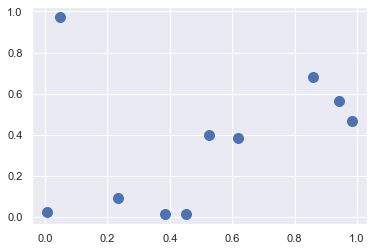

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1],s=100);

In [25]:
dist_sq=np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2,axis=-1)

In [26]:
differences=X[:,np.newaxis,:]-X[np.newaxis,:,:]
differences.shape

(10, 10, 2)

In [28]:
sq_differences=differences**2
sq_differences.shape

(10, 10, 2)

In [29]:
dist_sq=sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [30]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
nearest=np.argsort(dist_sq,axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [33]:
K=2
nearest_partition=np.argpartition(dist_sq,K+1,axis=1)

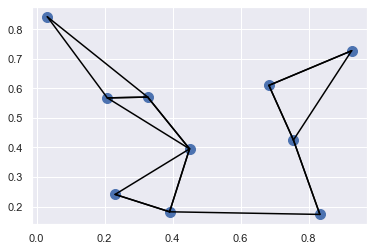

In [34]:
plt.scatter(X[:,0],X[:,1],s=100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j],X[i]),color='black')